In [66]:
!pip install osmapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Reto2/datasets


In [68]:
%cd "/content/gdrive/MyDrive/Reto2/datasets"

/content/gdrive/MyDrive/Reto2/datasets


In [69]:
import osmapi
import pandas as pd
import numpy as np 
api = osmapi.OsmApi()
print(api.NodeGet(123))

{'id': 123, 'visible': True, 'version': 12, 'changeset': 124176968, 'timestamp': datetime.datetime(2022, 7, 28, 9, 47, 39), 'user': 'owene', 'uid': 29598, 'lat': 59.9503286, 'lon': 10.7899198, 'tag': {}}


In [70]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
# el area ISO3166-2 CL-RM corresponde a region metropolitana de Chile (https://www.openstreetmap.org/relation/198848)
overpass_query = """
[out:json];
area["ISO3166-2"="CL-RM"][admin_level=4];
(node["amenity"="restaurant"](area);
 way["amenity"="restaurant"](area);
 rel["amenity"="restaurant"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data_restaurant = response.json()

In [71]:
overpass_query = """
[out:json];
area["ISO3166-2"="CL-RM"][admin_level=4];
(node["amenity"="hospital"](area);
 way["amenity"="hospital"](area);
 rel["amenity"="hospital"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data_hospital = response.json()

In [72]:
overpass_query = """
[out:json];
area["ISO3166-2"="CL-RM"][admin_level=4];
(node["amenity"="pub"](area);
 way["amenity"="pub"](area);
 rel["amenity"="pub"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data_pub = response.json()

In [73]:
overpass_query = """
[out:json];
area["ISO3166-2"="CL-RM"][admin_level=4];
(node["amenity"="school"](area);
 way["amenity"="school"](area);
 rel["amenity"="school"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data_school = response.json()

In [74]:
# en caso de ser neceario usar las coordenadas de las antenas
dataset_antena = pd.read_csv('bts_comuna.csv')
lat_antena = list(dataset_antena['lat'])
lon_antena = list(dataset_antena['lon'])
# guardo las coordenadas de las anteas en coor_antena
coor_antena = [None] * len(lat_antena)
for i in range(len(lat_antena)):
  coor_antena[i] = [None] * 2

for i in range(len(lat_antena)):
  coor_antena[i][0] = lon_antena[i]
  coor_antena[i][1] = lat_antena[i]
coor_antena
coor_antena = np.array(coor_antena)


In [75]:
#obtenemos las coordenadas de los destinos de los viajes (hacia donde va la gente)
dataset_full = pd.read_csv('trips.csv')

dataset = dataset_full.sample(100)

lat_trip = list(dataset['lat'])
lon_trip = list(dataset['lon'])
coor_trip = [None] * len(lat_trip)
for i in range(len(lat_trip)): # creo una matriz vacía
  coor_trip[i] = [None] * 2

for i in range(len(lat_trip)): # lleno la matriz con las coordenadas
  coor_trip[i][0] = lon_trip[i]
  coor_trip[i][1] = lat_trip[i]

coor_trip = np.array(coor_trip)


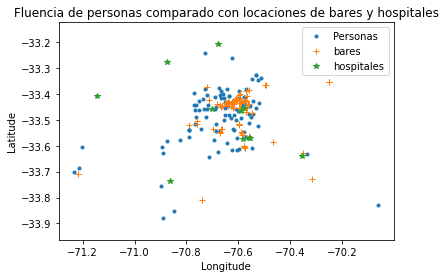

In [76]:
import numpy as np
import matplotlib.pyplot as plt
# Lleno listas con las coordenas de interés
coords_restaurant = []
coords_hospital = []
coords_pub = []
coords_school = []

for element in data_restaurant['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords_restaurant.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords_restaurant.append((lon, lat))

for element in data_hospital['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords_hospital.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords_hospital.append((lon, lat))

for element in data_pub['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords_pub.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords_pub.append((lon, lat))

for element in data_school['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords_school.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords_school.append((lon, lat))

# Pasar a un array de numpy
restaurant = np.array(coords_restaurant)
hospital = np.array(coords_hospital)
pub = np.array(coords_pub)
school = np.array(coords_school)

#plt.plot(restaurant[:, 0], restaurant[:, 1], '*') 
plt.plot(coor_trip[:, 0], coor_trip[:, 1], '.',label ='Personas')
plt.plot(pub[:, 0], pub[:, 1], '+',label ='bares') 
plt.plot(hospital[:, 0], hospital[:, 1], '*',label ='hospitales')
#plt.plot(school[:, 0], school[:, 1], '*') 
plt.title('Fluencia de personas comparado con locaciones de bares y hospitales')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [77]:
len(dataset)

100